### Text Summariser

In [1]:
# !pip install tensorflow_text

In [1]:
#import Libraries
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds



In [2]:
import tensorflow_text as text

In [3]:
# Loading the data
Articels = pathlib.Path("BBC News Summary/News Articles")
Summary = pathlib.Path("BBC News Summary/Summaries")

In [4]:
# count the total no of articels
art_count = len(list(Articels.glob('*/*.txt')))
print(art_count)
summary_count = len(list(Summary.glob('*/*.txt')))
print(summary_count)

2225
2225


In [5]:
print([path for path in pathlib.Path(Articels).iterdir()])

[WindowsPath('BBC News Summary/News Articles/business'), WindowsPath('BBC News Summary/News Articles/entertainment'), WindowsPath('BBC News Summary/News Articles/politics'), WindowsPath('BBC News Summary/News Articles/sport'), WindowsPath('BBC News Summary/News Articles/tech')]


In [6]:
def class_distribution(directory):
    
    #count number of image in each classes
    count= []
    path_=[]
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
            path_.append([os.path.join(path, name) for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]) 
    
    #name of the classes
    Classes = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(Classes,count)),columns =['Class', 'No. of Articels']),path_, Classes, count

df,path_article,classes, count_category = class_distribution(Articels)
df

,Class,No. of Articels
0,business,510
1,entertainment,386
2,politics,417
3,sport,511
4,tech,401


In [7]:
# check for consistency of summaries and Articels
df1,path_summary,_,_ = class_distribution(Summary)
df1

,Class,No. of Articels
0,business,510
1,entertainment,386
2,politics,417
3,sport,511
4,tech,401


In [8]:
# check for consistency of paths
import random
i=random.randint(0,len(classes)-1)
j=random.randint(0,len(path_article[i])-1)
print(path_article[i][j])
print(path_summary[i][j])

BBC News Summary\News Articles\business\354.txt
BBC News Summary\Summaries\business\354.txt


In [9]:

i=random.randint(0,len(classes)-1)
j=random.randint(0,len(path_article[i])-1)
file_path=path_article[i][j]

with open(file_path, "r") as f:
    article = f.read()
    print("Article")
    print("*"*50)
    print(article)

summary_path=path_summary[i][j]
with open(summary_path, "r") as f:
    article = f.read()
    print("\n")
    print("Summary")
    print("*"*50)
    print(article)



Article
**************************************************
Straw attacked on China arms

Moves to lift the European Union's ban on arms exports to China have been condemned by human rights groups and the Conservatives.

The 15 year embargo was imposed in the aftermath of China's crackdown on protesters in Tiananmen Square in 1989. UK Foreign Secretary Jack Straw, who will hold talks in Beijing on Thursday, said an EU arms code was more effective than the current ban. But Human Rights Watch says the EU is putting commerce above abuse concerns.

In December, the EU pledged to work towards lifting the ban but said it was not ready to do so yet. Germany and France have repeatedly called for the embargo to be lifted. Britain has been more cautious but Mr Straw last week said he also wanted it to end, despite US objections.

He expects it to be lifted over the next six months, a prediction which has alarmed critics. Brad Adams, from Human Rights Watch, said: "This is a huge political signal 

In [10]:
classes

['business', 'entertainment', 'politics', 'sport', 'tech']

In [11]:
count_category

[510, 386, 417, 511, 401]

In [12]:
# reading the data
Article_data=[]
Summary_data=[]
for i,class_ in enumerate(classes):
    for j in range(count_category[i]):
        file_path=path_article[i][j]
        with open(file_path, "r") as f:
            article = f.read()
            Article_data.append(article)
            f.close
        art_path=path_summary[i][j]
        with open(art_path, "r") as f:
            article = f.read()
            Summary_data.append(article)
            f.close
print(len(Article_data))
print(len(Summary_data))              

2225
2225


In [13]:
dataset=(list(zip(Article_data, Summary_data)))

In [14]:
random.shuffle(dataset)

In [15]:
print(dataset[1][0])
print("*"*20)
print(dataset[1][1])

Keanu Reeves given Hollywood star

Actor Keanu Reeves, best known for his role in the Matrix movies, has been awarded a star on the prestigious Hollywood Walk of Fame.

The 40-year-old attended the unveiling of the star with his mother, Patricia, and thanked her for inspiring him to become an actor. "When I was 15 years old I asked my mom if it was OK to be an actor," Reeves said. "She said: 'Whatever you want'." His star is the 2,277th to be embedded in the pavement on Hollywood Boulevard.

The actor, who was born in the Lebanese capital Beirut, also spoke of how he dropped out of school to pursue an acting career. "Hollywood was calling," he said, "So I got in my car, a 1969 British racing green Volvo with holes in the floor and bricks holding up the seats. I was a young man full of hopes and dreams." Reeves first found fame in the teen comedy Bill and Ted's Excellent Adventure, and went on to combine such blockbusters as Speed, The Devil's Advocate and the Matrix series, with smalle

In [16]:
# split the data into test and train
np.floor(.7*len(dataset))

1557.0

In [17]:

train_data=tf.data.Dataset.from_tensor_slices(dataset[0:int(np.floor(.7*len(dataset)))])
test_data=tf.data.Dataset.from_tensor_slices(dataset[int(np.floor(.7*len(dataset)))::])

In [18]:
train_X = train_data.map(lambda x : x[0])
train_y = train_data.map(lambda x : x[1])

In [19]:
for art in train_X.take(1):
    print("Article: ", art.numpy().decode('utf-8'))

Article:  Farrell saga to drag on - Lindsay

Wigan chairman Maurice Lindsay says he does not expect a quick solution to the on-going saga of captain Andy Farrell's possible switch to rugby union.

Leicester and Saracens are leading the chase for the player, but Lindsay told the BBC it was not yet a done deal. "As well as the Rugby Football Union, the league, the individual club and the England coaching team have a say, so it's not a quick decision," he said. "He's given us 12 years service so if he wants to go, we'd support him." The prospect of Farrell switching codes has been the main talking point of the Super League season so far. "It came as a bolt out of the blue to us," admitted Lindsay. "But he's a very loyal friend to the club, so there's no question that he's deserting us. He just fancies a challenge."

Although the move would be a lucrative one for both Farrell and Wigan, Lindsay said money was not a motivating factor for the club. "The money side of things hasn't been concl

In [20]:
#import bert_vocab_from_dataset to create vocablary using BERT
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [21]:
# parameters to be passed to bert_vocab
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = 8000,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [22]:
# genrate vocab from the training data
vocab = bert_vocab.bert_vocab_from_dataset(train_X.batch(1000).prefetch(2),**bert_vocab_args)

In [23]:
print(len(vocab))

6909


In [24]:
# random check vocab
print(vocab[:10])
print(vocab[100:110])
print(vocab[1000:1010])
print(vocab[-10:])

['[PAD]', '[UNK]', '[START]', '[END]', '!', '"', '#', '$', '%', '&']
['##ing', 'more', 'up', 'year', 'its', 'were', 'also', 'people', 'who', 'new']
['social', 'talks', '##ne', 'air', 'audience', 'average', 'bit', 'download', 'gave', 'offered']
['##.', '##/', '##:', '##;', '##=', '##?', '##[', '##]', '##`', '##£']


In [25]:
def write_vocab_file(filepath, vocab):
    with open(filepath, 'w') as f:
        for token in vocab:
            print(token, file=f)

In [26]:
# write vocab to text file
write_vocab_file('vocab.txt', vocab)

In [27]:
tokenizer = text.BertTokenizer('vocab.txt', **bert_tokenizer_params)

In [28]:
for art in train_X.batch(2).take(1):
    print(art.shape)
    print(art.numpy()[0].decode("utf-8"))
    
print(len(art))

(2,)
Farrell saga to drag on - Lindsay

Wigan chairman Maurice Lindsay says he does not expect a quick solution to the on-going saga of captain Andy Farrell's possible switch to rugby union.

Leicester and Saracens are leading the chase for the player, but Lindsay told the BBC it was not yet a done deal. "As well as the Rugby Football Union, the league, the individual club and the England coaching team have a say, so it's not a quick decision," he said. "He's given us 12 years service so if he wants to go, we'd support him." The prospect of Farrell switching codes has been the main talking point of the Super League season so far. "It came as a bolt out of the blue to us," admitted Lindsay. "But he's a very loyal friend to the club, so there's no question that he's deserting us. He just fancies a challenge."

Although the move would be a lucrative one for both Farrell and Wigan, Lindsay said money was not a motivating factor for the club. "The money side of things hasn't been concluded,

In [29]:
for summary in train_y.batch(2).take(1):
    print(summary.numpy()[0].decode("utf-8"))

Although the move would be a lucrative one for both Farrell and Wigan, Lindsay said money was not a motivating factor for the club.Lindsay also said he understood why rugby union was so interested in signing up Farrell."As well as the Rugby Football Union, the league, the individual club and the England coaching team have a say, so it's not a quick decision," he said."But he's a very loyal friend to the club, so there's no question that he's deserting us.Wigan chairman Maurice Lindsay says he does not expect a quick solution to the on-going saga of captain Andy Farrell's possible switch to rugby union."A shortage of money has never been a problem for us."It came as a bolt out of the blue to us," admitted Lindsay.Leicester and Saracens are leading the chase for the player, but Lindsay told the BBC it was not yet a done deal.


In [30]:
# Tokenize the examples -> (batch, word, word-piece)
token_batch = tokenizer.tokenize(art)

print(token_batch.shape)

(2, None, None)


In [31]:
# tokaniser create a 3d tensor array
# Merge the word and word-piece axes -> (batch, tokens)
token_batch = token_batch.merge_dims(-2,-1)
print(token_batch.shape)
for ex in token_batch.to_list():
    print(ex)

(2, None)
[3519, 54, 5873, 174, 64, 5674, 72, 16, 3983, 1784, 2148, 578, 48, 4925, 2878, 142, 3983, 188, 75, 442, 87, 1215, 36, 2931, 2936, 64, 63, 72, 16, 204, 54, 5873, 174, 65, 1149, 1169, 3519, 10, 54, 618, 3220, 64, 583, 833, 17, 1386, 66, 54, 6340, 713, 1623, 82, 842, 63, 4106, 68, 63, 393, 15, 85, 3983, 154, 63, 181, 71, 76, 87, 473, 36, 542, 290, 17, 5, 80, 180, 80, 63, 583, 831, 833, 15, 63, 633, 15, 63, 1328, 277, 66, 63, 202, 5651, 309, 81, 36, 228, 15, 139, 71, 10, 54, 87, 36, 2931, 356, 15, 5, 75, 73, 17, 5, 75, 10, 54, 407, 110, 448, 146, 303, 139, 123, 75, 712, 64, 224, 15, 91, 10, 39, 454, 203, 17, 5, 63, 4615, 65, 3519, 3220, 100, 6580, 79, 98, 63, 692, 1391, 551, 65, 63, 1844, 633, 418, 139, 354, 17, 5, 71, 390, 80, 36, 37, 2066, 171, 116, 65, 63, 1983, 64, 110, 15, 5, 1016, 3983, 17, 5, 85, 75, 10, 54, 36, 157, 6174, 6497, 2759, 64, 63, 277, 15, 139, 111, 10, 54, 145, 1533, 70, 75, 10, 54, 1213, 5971, 522, 110, 17, 75, 144, 2904, 3460, 36, 1123, 17, 5, 479, 63, 310, 

In [32]:
def lookup(token_ids):
    txt_tokens = tf.gather(vocab, token_batch)
    
    return txt_tokens

In [33]:
txt_tokens = tf.gather(vocab, token_batch)
# Join with spaces.
tf.strings.reduce_join(txt_tokens, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'farrell s ##ag ##a to drag on - lindsay wi ##gan chairman m ##au ##ric ##e lindsay says he does not expect a quick solution to the on - going s ##ag ##a of captain andy farrell \' s possible switch to rugby union . leicester and s ##ara ##ce ##ns are leading the chase for the player , but lindsay told the bbc it was not yet a done deal . " as well as the rugby football union , the league , the individual club and the england coaching team have a say , so it \' s not a quick decision , " he said . " he \' s given us 12 years service so if he wants to go , we \' d support him . " the prospect of farrell switch ##ing codes has been the main talking point of the super league season so far . " it came as a b ##ol ##t out of the blue to us , " admitted lindsay . " but he \' s a very lo ##yal friend to the club , so there \' s no question that he \' s de ##ser ##ting us . he just fan ##cies a challenge . " although the move would be a lucr

In [34]:
words = tokenizer.detokenize(token_batch)
words=tf.strings.reduce_join(words, separator=' ', axis=-1)
words.numpy()[0].decode("utf-8")

'farrell saga to drag on - lindsay wigan chairman maurice lindsay says he does not expect a quick solution to the on - going saga of captain andy farrell \' s possible switch to rugby union . leicester and saracens are leading the chase for the player , but lindsay told the bbc it was not yet a done deal . " as well as the rugby football union , the league , the individual club and the england coaching team have a say , so it \' s not a quick decision , " he said . " he \' s given us 12 years service so if he wants to go , we \' d support him . " the prospect of farrell switching codes has been the main talking point of the super league season so far . " it came as a bolt out of the blue to us , " admitted lindsay . " but he \' s a very loyal friend to the club , so there \' s no question that he \' s deserting us . he just fancies a challenge . " although the move would be a lucrative one for both farrell and wigan , lindsay said money was not a motivating factor for the club . " the 

In [35]:
# adding [START] and [END] tokens to the input data.
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
    count = ragged.bounding_shape()[0]
    starts = tf.fill([count,1], START)
    ends = tf.fill([count,1], END)
    return tf.concat([starts, ragged, ends], axis=1)

In [36]:
words = tokenizer.detokenize(add_start_end(token_batch))
tf.strings.reduce_join(words, separator=' ', axis=-1)

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b'[START] farrell saga to drag on - lindsay wigan chairman maurice lindsay says he does not expect a quick solution to the on - going saga of captain andy farrell \' s possible switch to rugby union . leicester and saracens are leading the chase for the player , but lindsay told the bbc it was not yet a done deal . " as well as the rugby football union , the league , the individual club and the england coaching team have a say , so it \' s not a quick decision , " he said . " he \' s given us 12 years service so if he wants to go , we \' d support him . " the prospect of farrell switching codes has been the main talking point of the super league season so far . " it came as a bolt out of the blue to us , " admitted lindsay . " but he \' s a very loyal friend to the club , so there \' s no question that he \' s deserting us . he just fancies a challenge . " although the move would be a lucrative one for both farrell and wigan , lindsay

In [37]:

import re
def cleanup_text(reserved_tokens, token_txt):
    # Drop the reserved tokens, except for "[UNK]".
    bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
    bad_token_re = "|".join(bad_tokens)

    bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
    result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

    # Join them into strings.
    result = tf.strings.reduce_join(result, separator=' ', axis=-1)

    
  
  
    return result

In [38]:
bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
bad_tokens


['\\[PAD\\]', '\\[START\\]', '\\[END\\]']

In [39]:
# check length of each article and its corresponding summary
lengths_art = []
lengths_summ=[]

for Art in train_X.batch(1024):
    art_tokens = tokenizer.tokenize(Art)
    lengths_art.append(art_tokens.row_lengths())
    print("*"*50)


for summ in train_y.batch(1024):
  
    sum_tokens = tokenizer.tokenize(summ)
    lengths_summ.append(sum_tokens.row_lengths())

**************************************************
**************************************************


In [40]:
lengths_art = np.concatenate(lengths_art)
lengths_summ = np.concatenate(lengths_summ)

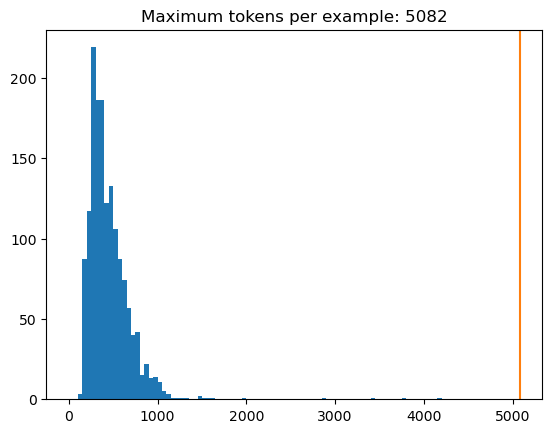

In [41]:
plt.hist(lengths_art, np.linspace(0, 5000, 101))
plt.ylim(plt.ylim())
max_length = max(lengths_art)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length}');

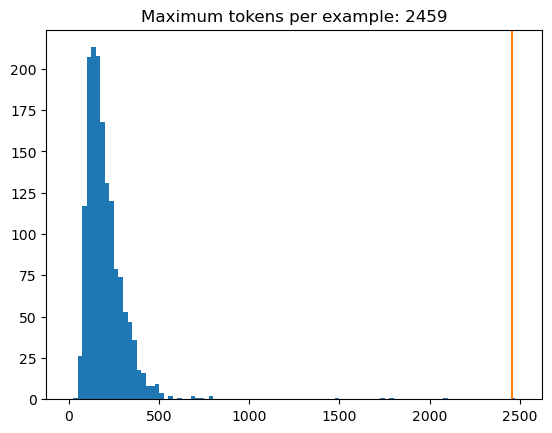

In [42]:
plt.hist(lengths_summ, np.linspace(0, 2500, 101))
plt.ylim(plt.ylim())
max_length = max(lengths_summ)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length}');

In [43]:
#train_x=[]
#for Art,summ in train_data.batch(1).take(1):
#    art_tokens = tokenizer.tokenize(Art)
#    print(Art.shape)
#    print(type(Art))
#    print(Art.numpy()[0])
#    print(type(art_tokens))
#    print(art_tokens.get_shape())

In [44]:
# keeping articels and summaries with tokens<=512, to keep the model light
train_x=[]
train_y=[]

summ_max_length =0
for Art,summ in train_data:
    art_tokens = tokenizer.tokenize(Art)
    summ_tokens = tokenizer.tokenize(summ)
    if art_tokens.row_lengths()<=512:
        train_x.append(Art.numpy())
        train_y.append(summ.numpy())
        if summ_tokens.row_lengths()>summ_max_length:
            summ_max_length= summ_tokens.row_lengths()
            
  
    




In [45]:
test_x=[]
test_y=[]

summ_max_length =0
for Art,summ in test_data:
    art_tokens = tokenizer.tokenize(Art)
    summ_tokens = tokenizer.tokenize(summ)
    if art_tokens.row_lengths()<=512:
        test_x.append(Art.numpy())
        test_y.append(summ.numpy())
        if summ_tokens.row_lengths()>summ_max_length:
            summ_max_length= summ_tokens.row_lengths()
            

In [46]:
print(len(train_x))
print(len(train_y))

1082
1082


In [47]:
print(len(test_x))
print(len(test_y))

457
457


In [48]:
summ_max_length

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([259], dtype=int64)>

In [49]:
lengths_art = []

for Art in train_x:
    art_tokens = tokenizer.tokenize(Art)
    lengths_art.append(art_tokens.row_lengths().numpy()[0])

lengths_summ=[]

for summ in train_y:
  
    sum_tokens = tokenizer.tokenize(summ)
    lengths_summ.append(sum_tokens.row_lengths().numpy()[0])

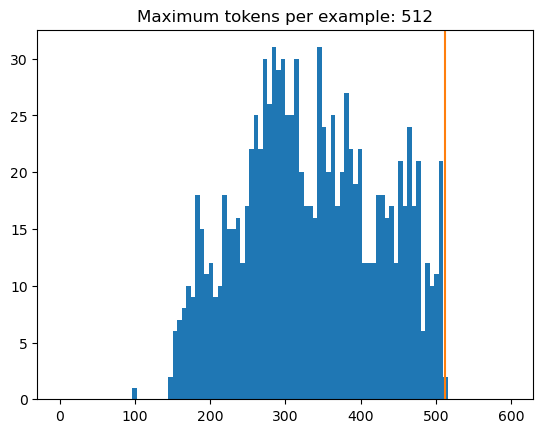

In [50]:
plt.hist(lengths_art, np.linspace(0, 600, 101))
plt.ylim(plt.ylim())
max_length = max(lengths_art)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length}');

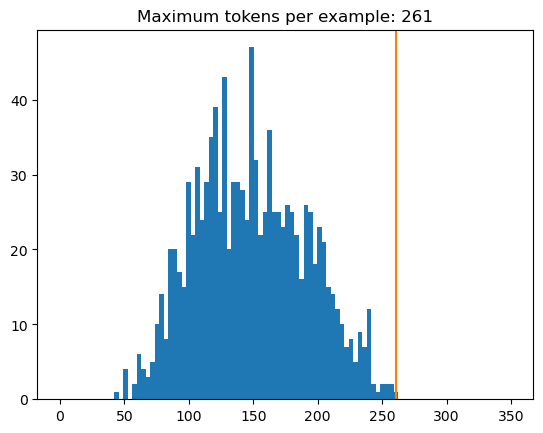

In [51]:
plt.hist(lengths_summ, np.linspace(0, 350, 101))
plt.ylim(plt.ylim())
max_length = max(lengths_summ)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length}');

In [52]:
train_data=tf.data.Dataset.from_tensor_slices((train_x,train_y))

In [53]:
test_data=tf.data.Dataset.from_tensor_slices((test_x,test_y))

In [54]:
train_data.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.string, name=None))

In [55]:
MAX_TOKENS_X=512
MAX_TOKENS_Y=256

def prepare_batch(x, y):
    x = tokenizer.tokenize(x)      # Output is ragged.
    x=x.merge_dims(-2,-1)
    x= add_start_end(x)
    x = x[:, :MAX_TOKENS_X]    # Trim to MAX_TOKENS.
  
    x = x.to_tensor()  # Convert to 0-padded dense Tensor
    

    y = tokenizer.tokenize(y)
    y=y.merge_dims(-2,-1)
    y= add_start_end(y)
    y = y[:, :(MAX_TOKENS_Y+1)]
    y_inp = y[:, :-1].to_tensor()  # Drop the [END] tokens
    y_out = y[:, 1:].to_tensor()   # Drop the [START] tokens

    return (x,y_inp), y_out

In [56]:
BUFFER_SIZE = 1000
BATCH_SIZE = 64
def make_batches(ds):
    return (
        ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
        .map(prepare_batch, tf.data.AUTOTUNE)
        .prefetch(buffer_size=tf.data.AUTOTUNE))

In [57]:
train_batches = make_batches(train_data)

In [58]:
test_batches = make_batches(test_data)

In [59]:
for (art, summ), out in train_batches.take(1):
    break

print(art.shape)
print(summ.shape)
print(out.shape)



(64, 512)
(64, 256)
(64, 256)


## Define the components

### Positional Encoding

In [60]:
def positional_encoding(length, emb_dim):
    depth = emb_dim/2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)
    pos_encoding=np.zeros((length,emb_dim))
    sin_angels= np.sin(angle_rads) 
    cos_angels= np.cos(angle_rads)
   
    pos_encoding[:,0::2]=cos_angels
    pos_encoding[:,1::2]=sin_angels

    return tf.cast(pos_encoding, dtype=tf.float32)

## Positional Embeddings

In [61]:
class PositionalEmbedding(tf.keras.layers.Layer):
    
    def __init__(self, vocab_size, d_model):
        
        super().__init__()
        self.d_model = d_model
        self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True) 
        self.pos_encoding = positional_encoding(length=2048, emb_dim=d_model)

    def compute_mask(self, *args, **kwargs):
        return self.embedding.compute_mask(*args, **kwargs)

    def call(self, x):
        length = tf.shape(x)[1]
        x = self.embedding(x)
        # This factor sets the relative scale of the embedding and positonal_encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

In [62]:
embedings = PositionalEmbedding(vocab_size=len(vocab), d_model=512)

### Base Attention Layer
this serves as base later for all attention heads

In [63]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dims):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(num_heads=num_heads,key_dim=key_dims)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
    def call(self,*args,**kwargs):
        encoder = kwargs["encoder"]
        use_causal_mask = kwargs["mask_value"]
        
        if encoder:
            x=args[0]
            attn_output, attn_scores = self.mha(query=x,key=x, value=x,return_attention_scores = True,
                                                use_causal_mask = False )
        elif use_causal_mask:
            x=args[0]
            attn_output, attn_scores = self.mha(query=x,key=x, value=x,
                                                return_attention_scores = True, use_causal_mask = True)
        else :
            x=args[0]
            context=args[1]
            attn_output, attn_scores = self.mha(query=x,key=context,value=context,
                                                return_attention_scores = True,use_causal_mask = False)
            
        x = self.add([x, attn_output])
        x = self.layernorm(x) 
        

        return x, attn_scores

In [64]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='relu'),
            tf.keras.layers.Dense(d_model),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x=self.layer_norm(x)
        
        return x

In [65]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, d_model,num_heads, num_layers,dff,dropout_rate=.1):
        super().__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.enc_layers= [
            BaseAttention(key_dims= d_model,
                         num_heads=num_heads)
            for _ in range(num_layers)]
        self.ffn_layers= [
            FeedForward(d_model=d_model,dff=dff)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate = dropout_rate)
    def call(self, x):
        
        

        # Add dropout.
        x = self.dropout(x)

        for i in range(self.num_layers):
            x, _ = self.enc_layers[i](x, mask_value =False, encoder =True)
            x    = self.ffn_layers[i](x)
            
        return x


In [66]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, d_model,num_heads, num_layers,dff,dropout_rate=.1):
        super().__init__()
        self.d_model = d_model
        self.num_layers = num_layers
        
        self.casual_attn_layers= [
            BaseAttention(key_dims= d_model,
                         num_heads=num_heads)
            for _ in range(num_layers)]
        self.ffn_layers_1= [
            FeedForward(d_model=d_model,dff=dff)
            for _ in range(num_layers)]
        self.decoder_layers= [
            BaseAttention(key_dims= d_model,
                         num_heads=num_heads)
            
            for _ in range(num_layers)]
        
        self.ffn_layers_2= [
            FeedForward(d_model=d_model,dff=dff)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)
        self.last_attn_scores = None
    def call(self, x, context):
        
      
        # Add dropout.
        x = self.dropout(x)

        for i in range(self.num_layers):
            x, _ = self.casual_attn_layers[i](x, mask_value=True, encoder=False)
            x    = self.ffn_layers_1[i](x)
            x, final_attn_scores = self.decoder_layers[i](x,context, mask_value=False, encoder=False)
            x    = self.ffn_layers_2[i](x)
        self.last_attn_scores = final_attn_scores    
        return x

In [67]:
class Transformer(tf.keras.Model):
    def __init__(self,*,vocab_size, d_model,num_heads, num_layers,dff,dropout_rate=.1):
        super().__init__()
        self.emb = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)
        
        self.encoder = Encoder(d_model=d_model,num_heads=num_heads,
                               num_layers=num_layers,dff=dff,dropout_rate=.1)
        
        self.decoder  = Decoder(d_model=d_model,num_heads=num_heads,
                               num_layers=num_layers,dff=dff,dropout_rate=.1)
        self.final_layer = tf.keras.layers.Dense(vocab_size)

    def call(self, inputs):
        context , x = inputs
        context     = self.emb(context)
        x           = self.emb(x)
        context     = self.encoder(context)
        x           = self.decoder (x, context)
        x           = self.decoder (x, context)
        logits      = self.final_layer(x)
        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del logits._keras_mask
            
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return logits
        
    

In [68]:
num_layers = 3
d_model = 128
dff = 1024
num_heads = 4


In [69]:
transformer =Transformer(vocab_size=len(vocab),d_model=d_model,num_layers=num_layers, num_heads=num_heads,dff=dff)

In [70]:
for inputs, out in train_batches.take(1):
    output= transformer(inputs)
    

In [71]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 positional_embedding_1 (Pos  multiple                 884352    
 itionalEmbedding)                                               
                                                                 
 encoder (Encoder)           multiple                  1582848   
                                                                 
 decoder (Decoder)           multiple                  3165696   
                                                                 
 dense_18 (Dense)            multiple                  891261    
                                                                 
Total params: 6,524,157
Trainable params: 6,524,157
Non-trainable params: 0
_________________________________________________________________


In [72]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=10):
        
        super().__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step=step
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [73]:
learning_rate = CustomSchedule(d_model)

Text(0.5, 0, 'Train Step')

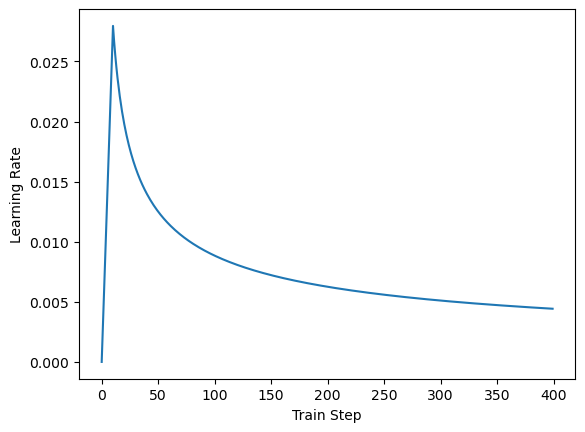

In [74]:
plt.plot(learning_rate(tf.range(400, dtype=tf.float32)))
plt.ylabel('Learning Rate')
plt.xlabel('Train Step')

In [75]:
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

In [76]:
def masked_loss(label, pred):
    mask = label != 0
    loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction="none")
    loss = loss_object(label, pred)

    mask = tf.cast(mask, dtype=loss.dtype)
    loss *= mask

    loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
    /return loss


def masked_accuracy(label, pred):
    pred = tf.argmax(pred, axis=2)
    label = tf.cast(label, pred.dtype)
    match = label == pred

    mask = label != 0

    match = match & mask
 
    match = tf.cast(match, dtype=tf.float32)
    mask = tf.cast(mask, dtype=tf.float32)
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

In [77]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer, 
    metrics=[masked_accuracy])

In [78]:
transformer.fit(train_batches,
                epochs=5)

Epoch 1/5
17/17 [==============================] - 12618s 747s/step - loss: 7.6137 - masked_accuracy: 0.0400
Epoch 2/5
 3/17 [====>.........................] - ETA: 3:25:24 - loss: 7.0805 - masked_accuracy: 0.0426

KeyboardInterrupt: 

In [145]:
  
for inp, out in train_batches.take(1):
    print(inp[0].shape)
    inp_x=inp[0][0][tf.newaxis]
    inp_y=inp[1][0][tf.newaxis]
    print(inp[0].numpy().shape)
    print(inp[1].numpy().shape)
    prediction=transformer.predict((inp_x,inp_y))
        
    
    break
             


(64, 512)
(64, 512)
(64, 256)
1/1 [==============================] - 13s 13s/step


In [146]:
print("Article")
print("*"*50)
words=tokenizer.detokenize(inp_x)
words=cleanup_text(reserved_tokens,words )
words.numpy()[0].decode("utf-8")



Article
**************************************************


'hewitt falls to dent lleyton hewitt suffered a shock defeat to taylor dent in the quarter - finals of the australian hardcourt championships in adelaide on friday . the top seed was a strong favourite for the title but went down 7 - 6 ( 7 - 4 ) 6 - 3 to the american . dent will face juan ignacio chela next after the fourth seed was too strong for jurgen melzer . olivier rochus beat third seed nicolas kiefer 6 - 7 ( 4 - 7 ) 7 - 6 ( 8 - 6 ) 7 - 5 and will take on second seed joachim johansson . the swede reached the last four by beating compatriot thomas enqvist 6 - 3 4 - 6 6 - 1 . " i felt like i was striking the ball much better , " said johansson . " i felt like i had a lot of break chances , i didn \' t take care of them all , but i broke him four times and he only broke me once . " i felt that was the key to get up in the set early . "'

In [147]:
words = tokenizer.detokenize(inp_y)
words=cleanup_text(reserved_tokens,words )
words.numpy()[0].decode("utf_8")

'dent will face juan ignacio chela next after the fourth seed was too strong for jurgen melzer . " i felt like i was striking the ball much better , " said johansson . the top seed was a strong favourite for the title but went down 7 - 6 ( 7 - 4 ) 6 - 3 to the american . " i felt that was the key to get up in the set early . "'

In [148]:
print(prediction.shape)
prediction= tf.argmax(prediction,axis=-1)
words = tokenizer.detokenize(prediction)
words=cleanup_text(reserved_tokens,words )
words.numpy()[0].decode("utf_8")



(1, 256, 6825)


'the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the

In [227]:
class CustomTokenizer(tf.Module):
    def __init__(self, reserved_tokens, vocab_path,name=None):
        super().__init__(name=name)
        self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
        self._reserved_tokens = reserved_tokens
        self._vocab_path = tf.saved_model.Asset(vocab_path)

        vocab = pathlib.Path(vocab_path).read_text().splitlines()
        self.vocab = tf.Variable(vocab)

        ## Create the signatures for export:   

        # Include a tokenize signature for a batch of strings. 
        self.tokenize.get_concrete_function(
            tf.TensorSpec(shape=[None], dtype=tf.string))

        # Include `detokenize` and `lookup` signatures for:
        #   * `Tensors` with shapes [tokens] and [batch, tokens]
        #   * `RaggedTensors` with shape [batch, tokens]
        self.detokenize.get_concrete_function(
            tf.TensorSpec(shape=[None, None], dtype=tf.int64))
        self.detokenize.get_concrete_function(
              tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

        self.lookup.get_concrete_function(
            tf.TensorSpec(shape=[None, None], dtype=tf.int64))
        self.lookup.get_concrete_function(
              tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

        # These `get_*` methods take no arguments
        self.get_vocab_size.get_concrete_function()
        self.get_vocab_path.get_concrete_function()
        self.get_reserved_tokens.get_concrete_function()

    @tf.function
    def tokenize(self, strings):
        enc = self.tokenizer.tokenize(strings)
        # Merge the `word` and `word-piece` axes.
        enc = enc.merge_dims(-2,-1)
        enc = add_start_end(enc)
        return enc

    @tf.function
    def detokenize(self, tokenized):
        words = self.tokenizer.detokenize(tokenized)
        return cleanup_text(self._reserved_tokens, words)

    @tf.function
    def lookup(self, token_ids):
        return tf.gather(self.vocab, token_ids)

    @tf.function
    def get_vocab_size(self):
        return tf.shape(self.vocab)[0]

    @tf.function
    def get_vocab_path(self):
        return self._vocab_path

    @tf.function
    def get_reserved_tokens(self):
        return tf.constant(self._reserved_tokens)

In [228]:
tokenizer = CustomTokenizer(reserved_tokens, 'vocab.txt')

In [367]:
class Summarizer(tf.Module):
    def __init__(self, tokenizer, transformer):
        super().__init__()
        
        self.tokenizer = tokenizer
        self.transformer = transformer

    def __call__(self, sentence, max_length=256):
        # The input sentence is Portuguese, hence adding the `[START]` and `[END]` tokens.
        assert isinstance(sentence, tf.Tensor)
        if len(sentence.shape) == 0:
            sentence = sentence[tf.newaxis]

        sentence = self.tokenizer.tokenize(sentence).to_tensor()

        inp      = sentence

        # As the output language is English, initialize the output with the
        # English `[START]` token.
        start_end = self.tokenizer.tokenize([''])[0]
        start = start_end[0][tf.newaxis]  # shape(1,)
        end = start_end[1][tf.newaxis]    # shape(1,)

        # `tf.TensorArray` is required here (instead of a Python list), so that the
        # dynamic-loop can be traced by `tf.function`.
        output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
        output_array = output_array.write(0, start)

        for i in tf.range(max_length):
            
            output = tf.transpose(output_array.stack())
            predictions = self.transformer([inp, output], training=False)

            # Select the last token from the `seq_len` dimension.
            predictions = predictions[:, -1:, :]  # Shape `(batch_size, 1, vocab_size)`.

            predicted_id = tf.argmax(predictions, axis=-1)
            

            # Concatenate the `predicted_id` to the output which is given to the
            # decoder as its input.
            output_array = output_array.write(i+1, predicted_id[0])

            if predicted_id == end:
                break

        output = tf.transpose(output_array.stack())
        # The output shape is `(1, tokens)`.
        text = tokenizer.detokenize(output)[0]  # Shape: `()`.

        tokens = tokenizer.lookup(output)[0]

        # `tf.function` prevents us from using the attention_weights that were
        # calculated on the last iteration of the loop.
        # So, recalculate them outside the loop.
        self.transformer([inp, output[:,:-1]], training=False)
        attention_weights = self.transformer.decoder.last_attn_scores

        return text, tokens, attention_weights

In [368]:
summarizer = Summarizer(tokenizer, transformer)

In [369]:
translated_text, translated_tokens, attention_weights=summarizer( (Article_data[1]))

In [370]:
translated_text

<tf.Tensor: shape=(), dtype=string, numpy=b'the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 

In [371]:
Article_data[1]

'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions u

In [372]:
def print_summary(sentence, tokens, ground_truth):
    print(f'{"Input:":15s}: {sentence}')
    print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
    print(f'{"Ground truth":15s}: {ground_truth}')

In [373]:
class ExportSummarizer(tf.Module):
    def __init__(self, summarizer):
        self.summarizer = summarizer

    @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
    def __call__(self, sentence):
        
        (result,
        tokens,
        attention_weights) = self.summarizer(sentence, max_length=256)

        return result

In [374]:
summarizer = ExportSummarizer(summarizer)

In [375]:
tf.saved_model.save(summarizer, export_dir='summarizer')

INFO:tensorflow:Assets written to: summarizer\assets


INFO:tensorflow:Assets written to: summarizer\assets
